In [2]:
!pip install biopython pandas matplotlib scikit-learn



   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   ------- -------------------------------- 0.5/2.7 MB 9.7 MB/s eta 0:00:01
   -------------------------------------- - 2.6/2.7 MB 11.1 MB/s eta 0:00:01
   ---------------------------------------- 2.7/2.7 MB 9.3 MB/s  0:00:00


In [4]:
from pathlib import Path

file_path = Path(r"C:\Users\PC\OneDrive\Desktop\promoters.data")


In [5]:
import pandas as pd

data = []

with open(file_path, "r") as f:
    for line in f:
        line = line.strip()
        if line == "":
            continue

        label, sample_id, seq = line.split(",", 2)

        data.append({
            "label": label,
            "id": sample_id,
            "seq": seq.replace(" ", "").replace("\t", "").upper()
        })

df = pd.DataFrame(data)
df["y"] = df["label"].map({"+": 1, "-": 0})

df.head(), df.shape
         

(  label         id                                                seq  y
 0     +        S10  TACTAGCAATACGCTTGCGTTCGGTGGTTAAGTATGTATAATGCGC...  1
 1     +       AMPC  TGCTATCCTGACAGTTGTCACGCTGATTGGTGTCGTTACAATCTAA...  1
 2     +       AROH  GTACTAGAGAACTAGTGCATTAGCTTATTTTTTTGTTATCATGCTA...  1
 3     +      DEOP2  AATTGTGATGTGTATCGAAGTGTGTTGCGGAGTAGATGTTAGAATA...  1
 4     +  LEU1_TRNA  TCGATAATTAACTATTGACGAAAAGCTGAAAACCACTAGAATGCGC...  1,
 (106, 4))

In [6]:
!pip install biopython


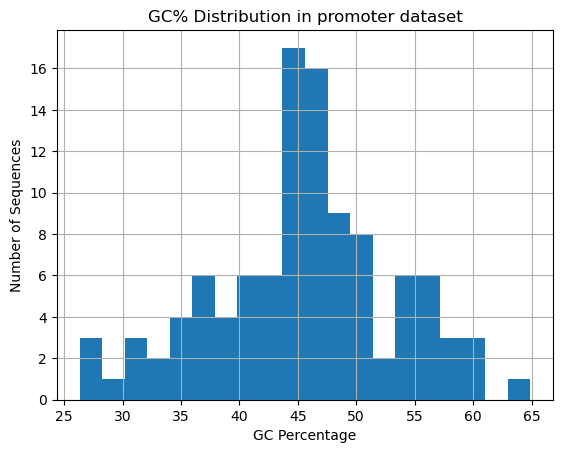

In [11]:
import matplotlib.pyplot as plt

plt.figure()
df["gc_percent"].hist(bins=20)
plt.title("GC% Distribution in promoter dataset")
plt.xlabel("GC Percentage")
plt.ylabel("Number of Sequences")
plt.show()


In [13]:
from collections import Counter

def count_kmers(seq, k=3):
    kmers = []
    for i in range(len(seq) - k + 1):
        kmers.append(seq[i:i+k])
    return Counter(kmers)
    

In [14]:
k = 3

all_kmers = Counter()

for seq in df["seq"]:
    all_kmers.update(count_kmers(seq, k))

all_kmers.most_common(10)


[('TTT', 161),
 ('ATG', 129),
 ('TTG', 127),
 ('AAA', 126),
 ('TGA', 125),
 ('CTT', 123),
 ('TGT', 120),
 ('AAC', 119),
 ('TAT', 116),
 ('CGC', 113)]

In [15]:
pos_kmers = Counter()
neg_kmers = Counter()

for seq in df[df["label"] == "+"]["seq"]:
    pos_kmers.update(count_kmers(seq, k))

for seq in df[df["label"] == "-"]["seq"]:
    neg_kmers.update(count_kmers(seq, k))

pos_kmers.most_common(10), neg_kmers.most_common(10)


([('AAA', 111),
  ('TTT', 108),
  ('TTA', 75),
  ('TAT', 75),
  ('AAT', 74),
  ('ATA', 72),
  ('TAA', 70),
  ('TGT', 69),
  ('CGC', 65),
  ('TTG', 65)],
 [('ATG', 77),
  ('GAG', 75),
  ('TGA', 73),
  ('ACG', 69),
  ('TCA', 69),
  ('CTC', 65),
  ('AAC', 63),
  ('TTG', 62),
  ('GAC', 62),
  ('AGA', 61)])

In [16]:
top_pos = pos_kmers.most_common(10)
df_top_kmers = pd.DataFrame(top_pos, columns=["kmer", "count"])
df_top_kmers

,kmer,count
0,AAA,111
1,TTT,108
2,TTA,75
3,TAT,75
4,AAT,74
5,ATA,72
6,TAA,70
7,TGT,69
8,CGC,65
9,TTG,65


In [17]:
diff = {}

for kmer in pos_kmers:
    diff[kmer] = pos_kmers[kmer] - neg_kmers.get(kmer, 0)

top_diff = sorted(diff.items(), key=lambda x: x[1], reverse=True)[:10]
pd.DataFrame(top_diff, columns=["kmer", "difference"])


,kmer,difference
0,AAA,96
1,TTT,55
2,ATA,44
3,TTA,41
4,AAT,37
5,TAA,37
6,TAT,34
7,CCC,28
8,TAG,20
9,TGT,18


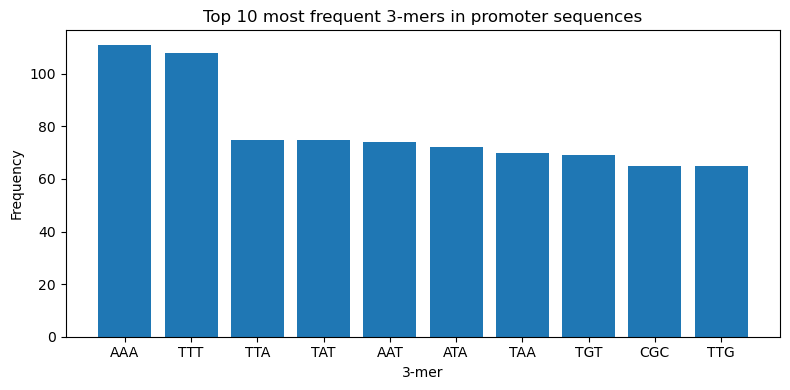

In [18]:
import matplotlib.pyplot as plt

top_kmers = pos_kmers.most_common(10)
kmers, counts = zip(*top_kmers)

plt.figure(figsize=(8, 4))
plt.bar(kmers, counts)
plt.title("Top 10 most frequent 3-mers in promoter sequences")
plt.xlabel("3-mer")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


In [19]:
top_pos = pos_kmers.most_common(10)
top_neg = neg_kmers.most_common(10)

pos_kmers_list, pos_counts = zip(*top_pos)
neg_kmers_list, neg_counts = zip(*top_neg)


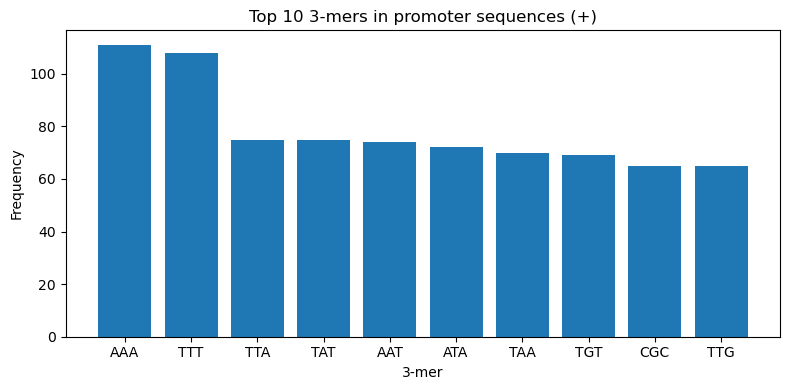

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.bar(pos_kmers_list, pos_counts)
plt.title("Top 10 3-mers in promoter sequences (+)")
plt.xlabel("3-mer")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


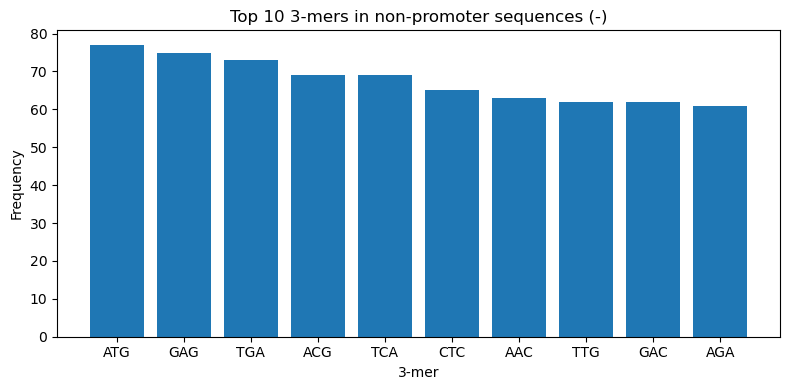

In [21]:
plt.figure(figsize=(8, 4))
plt.bar(neg_kmers_list, neg_counts)
plt.title("Top 10 3-mers in non-promoter sequences (-)")
plt.xlabel("3-mer")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


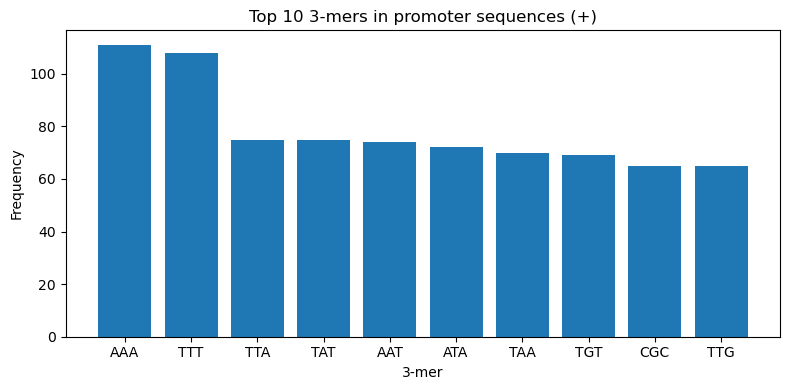

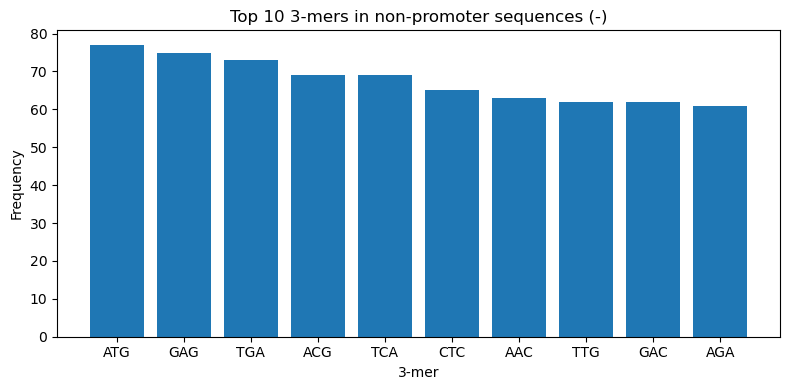

In [22]:
plt.figure(figsize=(8, 4))
plt.bar(pos_kmers_list, pos_counts)
plt.title("Top 10 3-mers in promoter sequences (+)")
plt.xlabel("3-mer")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig("top_10_3mers_promoters.png")
plt.show()

plt.figure(figsize=(8, 4))
plt.bar(neg_kmers_list, neg_counts)
plt.title("Top 10 3-mers in non-promoter sequences (-)")
plt.xlabel("3-mer")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig("top_10_3mers_non_promoters.png")
plt.show()
